# Decision-Driven Exploratory Data Analysis on Netflix Content

This analysis explores Netflix’s catalog to identify trends and gaps that can inform future content investment decisions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [9]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.shape

(8807, 12)

The data contains 8807 rows and 12 columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df['duration'].value_counts().head(10)



,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
95 min,137


In [14]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [15]:
df['duration_minutes'] = np.where(
    df['type'] == 'Movie',
    df['duration_num'],
    np.nan
)

df['seasons'] = np.where(
    df['type'] == 'TV Show',
    df['duration_num'],
    np.nan
)


In [16]:
df[['type', 'duration', 'duration_minutes', 'seasons']].head(10)


,type,duration,duration_minutes,seasons
0,Movie,90 min,90.0,NaN
1,TV Show,2 Seasons,NaN,2.0
2,TV Show,1 Season,NaN,1.0
3,TV Show,1 Season,NaN,1.0
4,TV Show,2 Seasons,NaN,2.0
5,TV Show,1 Season,NaN,1.0
6,Movie,91 min,91.0,NaN
7,Movie,125 min,125.0,NaN
8,TV Show,9 Seasons,NaN,9.0
9,Movie,104 min,104.0,NaN


The duration column looked messy it consisted od movies and tv shows but with different units of time .Splitting it into separate columns enables accurate analysis of content length for movies and longevity for TV shows.


#Movies distribution

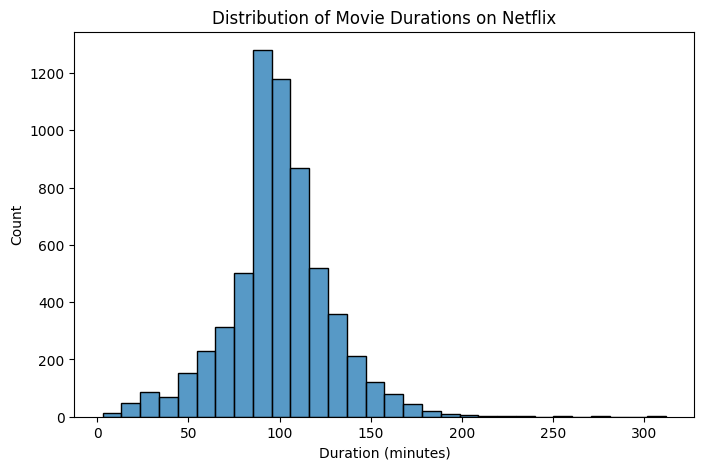

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['type']=='Movie']['duration_minutes'], bins=30)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.show()


Most Movies fall into a length of 90 to 120 minutes ,which makes it a standard time for movie duration.

#TV shows distribution

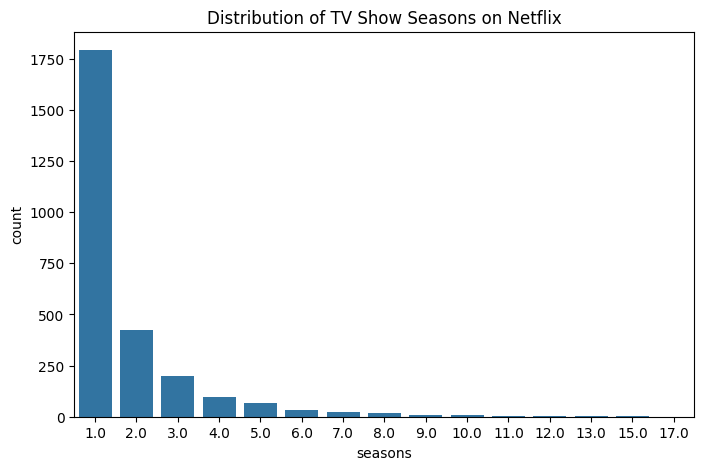

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='seasons', data=df[df['type']=='TV Show'])
plt.title("Distribution of TV Show Seasons on Netflix")
plt.show()


Most series have 1-3 seasons ideally that makes it more worth watching and keeps the user hokked.

In [19]:
df['date_added'].head()

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


In [20]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [21]:
df['date_added'].isnull().sum()


np.int64(98)

In [22]:
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month


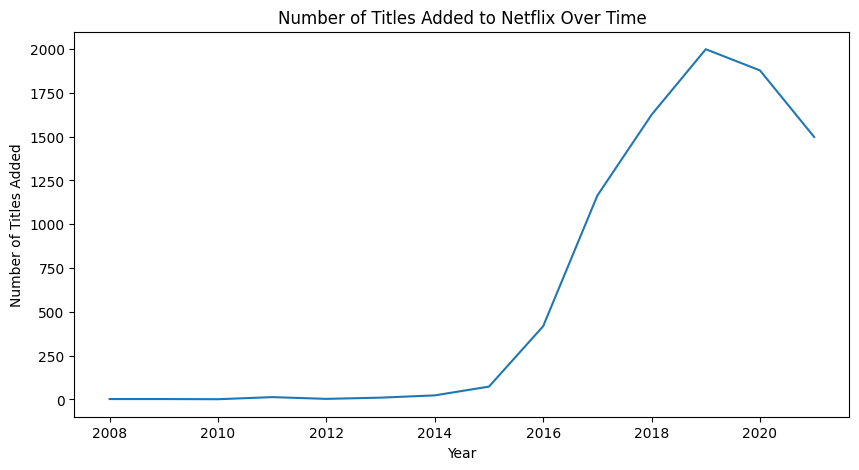

In [23]:
plt.figure(figsize=(10,5))
df['added_year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Titles Added to Netflix Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()


Netflix’s content additions increased sharply after 2016, indicating an aggressive expansion phase.

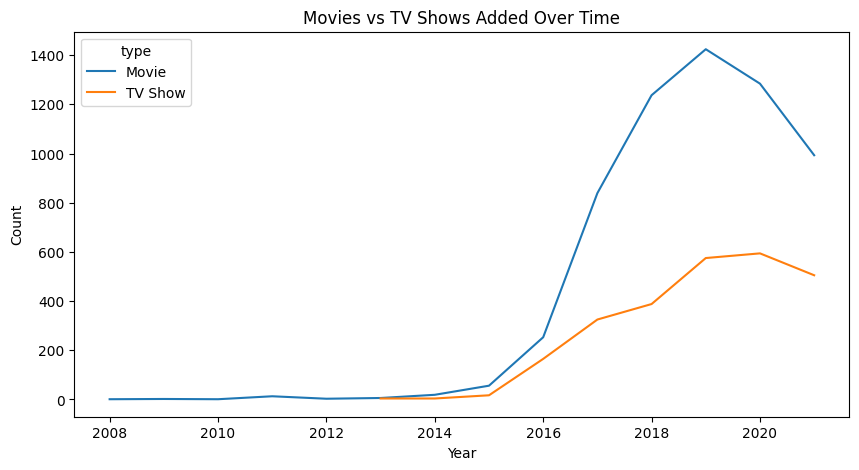

In [24]:
content_by_year = df.groupby(['added_year', 'type']).size().unstack()

content_by_year.plot(kind='line', figsize=(10,5))
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


The rise in TV shows suggests a strategic shift toward episodic content that increases user retention.

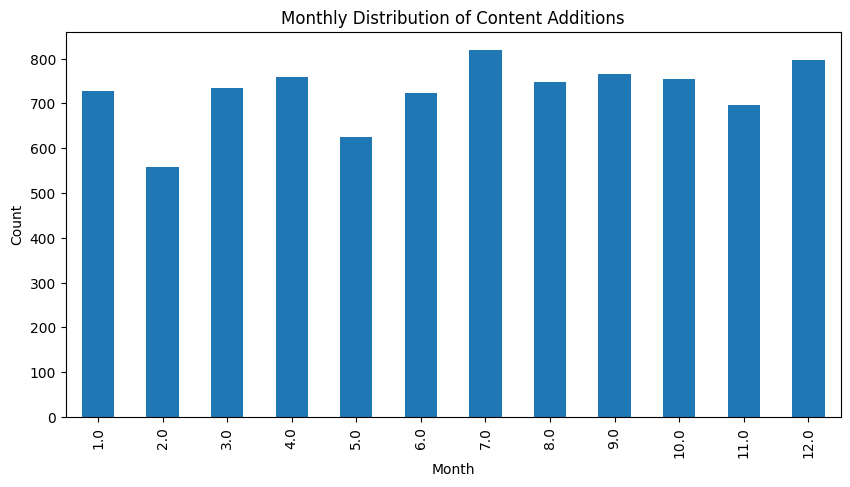

In [25]:
df['added_month'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Monthly Distribution of Content Additions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


## Time-Based Insights

- Netflix significantly increased content additions after 2016.
- TV shows have grown faster than movies, suggesting a focus on long-term engagement.
- Content additions appear to peak during certain months, indicating planned release cycles.
